In [1]:
import numpy as np
import pandas as pd
# Setting random seed to get reproducible runs
RSEED = 100

# Importing dataset and processing it

In [5]:
df = pd.read_csv("../data_clean/cancer_industry.csv")

In [6]:
df.head()

,locale,fips,areatype,cancer,stateFIPS,state,cancer_description,annual_count_avg,incidence rate_per_100000,incidence rate_lower_95_confidence,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
0,"Autauga County(6,10)",1001,county,1,1,alabama,All Cancer Sites,304,495.6,470.6,...,8.749380e-08,0.0,0.004263,0.000000,5.005340e-10,1.617190e-05,0.000365,0.026608,0.869459,0.180875
1,"Autauga County(6,10)",1001,county,1,1,alabama,All Cancer Sites,304,495.6,470.6,...,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2,"Autauga County(6,10)",1001,county,1,1,alabama,All Cancer Sites,304,495.6,470.6,...,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
3,"Autauga County(6,10)",1001,county,1,1,alabama,All Cancer Sites,304,495.6,470.6,...,1.687070e-04,0.0,0.084219,1558.288943,6.755460e-06,2.148530e-08,1050.804066,8.594629,42.953215,26.761900
4,"Autauga County(6,10)",1001,county,1,1,alabama,All Cancer Sites,304,495.6,470.6,...,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000


In [7]:
df.columns

Index(['locale', 'fips', 'areatype', 'cancer', 'stateFIPS', 'state',
       'cancer_description', 'annual_count_avg', 'incidence rate_per_100000',
       'incidence rate_lower_95_confidence',
       'incidence rate_upper_95_confidence', 'county', 'name', 'industry_code',
       'industry_detail', 'relevant_naics', 'payann', 'total_compensation',
       'added_value ($)', 'local_tranformation_ind', 'estab', 'emp', 'ACID',
       'ENRG', 'ETOX', 'EUTR', 'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC', 'HNC',
       'HRSP', 'HTOX', 'JOBS', 'LAND', 'METL', 'MINE', 'MSW', 'NREN', 'OZON',
       'PEST', 'REN', 'SMOG', 'VADD', 'WATR'],
      dtype='object')

In [8]:
df.shape

(7030318, 46)

## Only keeping the values that we are interested in

### Keeping general statistics for all types of cancer

In [9]:
dataset = df[df['cancer'] == 1].copy()
dataset.shape

(305666, 46)

### Keeping the columns that we are interested in

In [10]:
# for now we drop the 'fips' column because we supose that the effect of having an idustry present in a certain
# area will be the same in any location
dataset.drop(['locale', 'fips','areatype', 'cancer', 'stateFIPS', 'state',
              'cancer_description', 'annual_count_avg', 'incidence rate_per_100000',
              'incidence rate_lower_95_confidence','incidence rate_upper_95_confidence',
              'industry_detail', 'relevant_naics','county', 'name', 'local_tranformation_ind',
              'total_compensation', 'added_value ($)'], axis=1, inplace=True)

In [11]:
dataset.tail()

,industry_code,payann,estab,emp,ACID,ENRG,ETOX,EUTR,FOOD,GCC,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
7029059,812200,0.000,1,0,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
7029060,812300,0.000,1,0,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
7029061,813100,0.177,8,15,0.000001,0.0,0.000001,1.472570e-07,0.000143,0.004671,...,2.589830e-11,0.0,0.001015,0.0,0.0,0.0,0.0,0.000049,0.108083,0.000396
7029062,813a00,0.000,1,0,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
7029063,813b00,0.000,2,0,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


# Now we want to predict the 24 environemental factors from varialbles such as fips, pay_ann, total_compensation, added_value, #estab, #emp

## First we have to create one-hot vectors for idustry_codes and fips values

In [12]:
#initializing 1-hot vectors to 0
for ind_code in dataset["industry_code"].unique():
    dataset[ind_code] = 0
    dataset[ind_code] = dataset[ind_code].astype(np.uint8)

In [13]:
dataset.tail()

,industry_code,payann,estab,emp,ACID,ENRG,ETOX,EUTR,FOOD,GCC,...,322291,311230,332913,334300,335221,325413,333991,311221,335110,335224
7029059,812200,0.000,1,0,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
7029060,812300,0.000,1,0,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
7029061,813100,0.177,8,15,0.000001,0.0,0.000001,1.472570e-07,0.000143,0.004671,...,0,0,0,0,0,0,0,0,0,0
7029062,813a00,0.000,1,0,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
7029063,813b00,0.000,2,0,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [14]:
def set_one_hot(row):
    row[row['industry_code']] = 1
    return row

In [15]:
dataset = dataset.apply(set_one_hot, axis=1)

In [16]:
len(dataset['industry_code'].unique())

335

In [17]:
dataset.tail()

,industry_code,payann,estab,emp,ACID,ENRG,ETOX,EUTR,FOOD,GCC,...,322291,311230,332913,334300,335221,325413,333991,311221,335110,335224
7029059,812200,0.000,1,0,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
7029060,812300,0.000,1,0,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
7029061,813100,0.177,8,15,0.000001,0.0,0.000001,1.472570e-07,0.000143,0.004671,...,0,0,0,0,0,0,0,0,0,0
7029062,813a00,0.000,1,0,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
7029063,813b00,0.000,2,0,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [18]:
dataset.loc[7029059, "payann"]

0.0

In [19]:
#print(list(dataset.columns))

## Partitionning our dataset into train and test sets

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x1 = pd.concat([dataset.loc[:, 'payann':'emp'], dataset.loc[:, '113000':]], axis=1)
y = dataset.loc[:, 'ACID':'WATR']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)

scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)

XTrain (213966, 338)
XTest (91700, 338)


## Random Forest Regression

### Training a base model on scaled data

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Create the model with 100 trees
regressor_scaled = RandomForestRegressor(n_estimators = 100,
                                  random_state = RSEED)

# Fit on training data
regressor_scaled.fit(X_train, y_train)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

In [55]:
from sklearn import metrics
train_rf_predictions = regressor_scaled.predict(X_train)
rf_predictions = regressor_scaled.predict(X_test)
r2_train = metrics.r2_score(y_train, train_rf_predictions)

r2_test = metrics.r2_score(y_test, rf_predictions)

print('r2_score Train using metrics.r2_score:',r2_train)
print('r2_score Train using built in score fct:', regressor_scaled.score(X_train, y_train))
print()

print('r2_score Test using metrics.r2_score:', r2_test)
print('r2_score Test using built in score fct:', regressor_scaled.score(X_test, y_test))

r2_score Train using metrics.r2_score: 0.9427968657392064


/Users/ghitafilali/anaconda3/envs/cse6242/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


r2_score Train using built in score fct: 0.9183257631181065

r2_score Test using metrics.r2_score: 0.5873234032067477
r2_score Test using built in score fct: 0.9264125197209387


/Users/ghitafilali/anaconda3/envs/cse6242/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [56]:
n_nodes = []
max_depths = []

for ind_tree in regressor_scaled.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 84624
Average maximum depth 166


Text(0, 0.5, 'Feature')

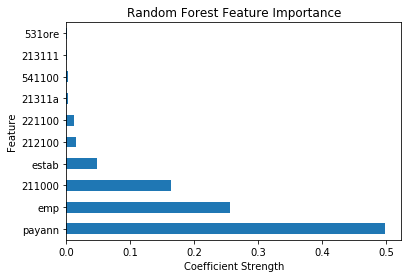

In [57]:
ind = np.argsort(regressor_scaled.feature_importances_)[::-1]
imp = regressor_scaled.feature_importances_[ind][:10]
cols =x1.columns[ind][:10]
pl = pd.Series(imp, index=cols).plot(kind='barh', title='Random Forest Feature Importance')
pl.set_xlabel("Coefficient Strength")
pl.set_ylabel("Feature")

In [58]:
# Exporting base model
import pickle
pickle.dump(regressor_scaled, open("base_random_forest_latest.pkl", 'wb'))

In [59]:
from sklearn.model_selection import cross_val_score
cross_val_score(regressor_scaled, scaler.transform(x1), y, cv=5, scoring='r2')

array([0.45715413, 0.86523419, 0.20693806, 0.87197222, 0.54000949])

## Hypertunning on scaled data

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=RSEED, verbose=10)

random_grid = {'n_estimators':[100, 200, 400, 800, 1200],
               'max_depth': [None],
              }

rf_random = GridSearchCV(rf, random_grid, cv = 3, verbose=10, n_jobs = 10)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  15 | elapsed: 103.7min remaining: 673.9min
[Parallel(n_jobs=10)]: Done   4 out of  15 | elapsed: 190.7min remaining: 524.5min
[Parallel(n_jobs=10)]: Done   6 out of  15 | elapsed: 193.7min remaining: 290.6min
[Parallel(n_jobs=10)]: Done   8 out of  15 | elapsed: 315.0min remaining: 275.7min
[Parallel(n_jobs=10)]: Done  10 out of  15 | elapsed: 484.0min remaining: 242.0min
[Parallel(n_jobs=10)]: Done  12 out of  15 | elapsed: 515.3min remaining: 128.8min
[Parallel(n_jobs=10)]: Done  15 out of  15 | elapsed: 664.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 800


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s remaining:    0.0s


building tree 2 of 800


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.1s remaining:    0.0s


building tree 3 of 800


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   36.1s remaining:    0.0s


building tree 4 of 800


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   48.4s remaining:    0.0s


building tree 5 of 800


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   59.7s remaining:    0.0s


building tree 6 of 800


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.2min remaining:    0.0s


building tree 7 of 800


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.4min remaining:    0.0s


building tree 8 of 800


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.6min remaining:    0.0s


building tree 9 of 800


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.8min remaining:    0.0s


building tree 10 of 800
building tree 11 of 800
building tree 12 of 800
building tree 13 of 800
building tree 14 of 800
building tree 15 of 800
building tree 16 of 800
building tree 17 of 800
building tree 18 of 800
building tree 19 of 800
building tree 20 of 800
building tree 21 of 800
building tree 22 of 800
building tree 23 of 800
building tree 24 of 800
building tree 25 of 800
building tree 26 of 800
building tree 27 of 800
building tree 28 of 800
building tree 29 of 800
building tree 30 of 800
building tree 31 of 800
building tree 32 of 800
building tree 33 of 800
building tree 34 of 800
building tree 35 of 800
building tree 36 of 800
building tree 37 of 800
building tree 38 of 800
building tree 39 of 800
building tree 40 of 800
building tree 41 of 800
building tree 42 of 800
building tree 43 of 800
building tree 44 of 800
building tree 45 of 800
building tree 46 of 800
building tree 47 of 800
building tree 48 of 800
building tree 49 of 800
building tree 50 of 800
building tree 51

building tree 342 of 800
building tree 343 of 800
building tree 344 of 800
building tree 345 of 800
building tree 346 of 800
building tree 347 of 800
building tree 348 of 800
building tree 349 of 800
building tree 350 of 800
building tree 351 of 800
building tree 352 of 800
building tree 353 of 800
building tree 354 of 800
building tree 355 of 800
building tree 356 of 800
building tree 357 of 800
building tree 358 of 800
building tree 359 of 800
building tree 360 of 800
building tree 361 of 800
building tree 362 of 800
building tree 363 of 800
building tree 364 of 800
building tree 365 of 800
building tree 366 of 800
building tree 367 of 800
building tree 368 of 800
building tree 369 of 800
building tree 370 of 800
building tree 371 of 800
building tree 372 of 800
building tree 373 of 800
building tree 374 of 800
building tree 375 of 800
building tree 376 of 800
building tree 377 of 800
building tree 378 of 800
building tree 379 of 800
building tree 380 of 800
building tree 381 of 800


building tree 670 of 800
building tree 671 of 800
building tree 672 of 800
building tree 673 of 800
building tree 674 of 800
building tree 675 of 800
building tree 676 of 800
building tree 677 of 800
building tree 678 of 800
building tree 679 of 800
building tree 680 of 800
building tree 681 of 800
building tree 682 of 800
building tree 683 of 800
building tree 684 of 800
building tree 685 of 800
building tree 686 of 800
building tree 687 of 800
building tree 688 of 800
building tree 689 of 800
building tree 690 of 800
building tree 691 of 800
building tree 692 of 800
building tree 693 of 800
building tree 694 of 800
building tree 695 of 800
building tree 696 of 800
building tree 697 of 800
building tree 698 of 800
building tree 699 of 800
building tree 700 of 800
building tree 701 of 800
building tree 702 of 800
building tree 703 of 800
building tree 704 of 800
building tree 705 of 800
building tree 706 of 800
building tree 707 of 800
building tree 708 of 800
building tree 709 of 800


[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed: 194.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=100,
                                             verbose=10, warm_start=False),
             iid='deprecated', n_jo

In [29]:
rf_random.best_params_

{'max_depth': None, 'n_estimators': 800}

In [30]:
rf_random.cv_results_

{'mean_fit_time': array([ 6169.70411475, 11517.96304997, 18777.37723645, 25993.77697229,
        29414.36331662]),
 'std_fit_time': array([  43.44590174,   89.30425398,  148.47630579, 2077.03854061,
        1892.49480338]),
 'mean_score_time': array([ 21.15645107,  43.92305096,  80.72225769,  99.6491309 ,
        115.73421462]),
 'std_score_time': array([ 0.39563289,  4.44107637, 16.09681613, 10.98284971, 21.26489679]),
 'param_max_depth': masked_array(data=[None, None, None, None, None],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 200, 400, 800, 1200],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': None, 'n_estimators': 100},
  {'max_depth': None, 'n_estimators': 200},
  {'max_depth': None, 'n_estimators': 400},
  {'max_depth': None, 'n_estimators': 800},
  {'max_depth': None, 'n_estimators

### Exporting results

In [28]:
import csv

results_file = open("grid_search_results.csv", "w")

writer = csv.writer(results_file)

for key, value in rf_random.cv_results_.items():
    writer.writerow([key, value])
    

### Evaluating best model

In [31]:
from sklearn import metrics
train_rf_predictions = rf_random.best_estimator_.predict(X_train)
rf_predictions = rf_random.best_estimator_.predict(X_test)
r2_train = metrics.r2_score(y_train, train_rf_predictions)

r2_test = metrics.r2_score(y_test, rf_predictions)

print('r2_score Train using metrics.r2_score:',r2_train)
print('r2_score Train using built in score fct:', rf_random.best_estimator_.score(X_train, y_train))
print()

print('r2_score Test using metrics.r2_score:', r2_test)
print('r2_score Test using built in score fct:', rf_random.best_estimator_.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elap

r2_score Train using metrics.r2_score: 0.9472767764217589


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:  1.9min finished
/Users/ghitafilali/anaconda3/envs/cse6242/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of mu

r2_score Train using built in score fct: 0.9304826454749522

r2_score Test using metrics.r2_score: 0.5885488766230719


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s


r2_score Test using built in score fct: 0.9311754629911315


[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:  1.3min finished
/Users/ghitafilali/anaconda3/envs/cse6242/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


Text(0, 0.5, 'Feature')

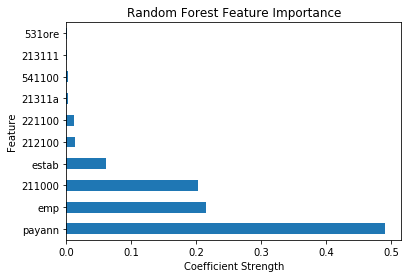

In [42]:
ind = np.argsort(rf_random.best_estimator_.feature_importances_)[::-1]
imp = rf_random.best_estimator_.feature_importances_[ind][:10]
cols =x1.columns[ind][:10]
pl = pd.Series(imp, index=cols).plot(kind='barh', title='Random Forest Feature Importance')
pl.set_xlabel("Coefficient Strength")
pl.set_ylabel("Feature")

In [40]:
# Exporting best model
import pickle
pickle.dump(rf_random.best_estimator_, open("most_acurate_random_forest.pkl", 'wb'))